## 1. VSQL Introduction

Variational Shadow Quantum Learning (VSQL) is a hybrid quantum-classical framework for supervised quantum learning, which utilizes parameterized quantum circuits and classical shadows. Unlike commonly used variational quantum algorithms, the VSQL method extracts "local" features from the subspace instead of the whole Hilbert space.

## 2. Introduction to the Model Principle

The flow chart of VSQL is as follows.

![pipeline](https://ai-studio-static-online.cdn.bcebos.com/2b806cc0405e425995df1786a5c5976196c5ca83697647d9ae70ac7cc0bf83c9 "Flow chart of VSQL")
<div style="text-align:center">Flow chart of VSQL</div>

The training steps are as below.

1. Encode a classical data point $\mathbf{x}^i$ into a quantum state $\left|\mathbf{x}^i\right>$.
2. Prepare a parameterized local quantum circuit $U(\mathbf{\theta})$ and initialize its parameters $\mathbf{\theta}$.
3. Apply $U(\mathbf{\theta})$ on the first few qubits. Then, obtain a shadow feature via measuring a local observable, for instance, $X\otimes X\cdots \otimes X$, on these qubits.
4. Sliding down $U(\mathbf{\theta})$ one qubit each time, repeat step 3 until the last qubit has been covered.
5. Feed all shadow features obtained from steps 3-4 to an FCNN and get the predicted label $\tilde{\mathbf{y}}^i$ through an activation function. For multi-label classification problems, we use the softmax activation function.
5. Repeat steps 3-5 until all data points in the data set have been processed. Then calculate the loss function $\mathcal{L}(\mathbf{\theta}, \mathbf{W}, \mathbf{b})$.
6. Adjust the parameters $\mathbf{\theta}$, $\mathbf{W}$, and $\mathbf{b}$ through optimization methods such as gradient descent to minimize the loss function. Then we get the optimized model $\mathcal{F}$.

Since VSQL only extracts local shadow features, it can be easily implemented on quantum devices with topological connectivity limits. Besides, since the $U(\mathbf{\theta})$ used in circuits are identical, the number of parameters involved is significantly smaller than other commonly used variational quantum classifiers.

### 2.1 Introduction to local shadow circuits

Now, we are ready for the next step. Before diving into details of the circuit, we need to clarify several parameters:
- $n$: the number of qubits encoding each data point.
- $n_{qsc}$: the width of the quantum shadow circuit . We only apply $U(\mathbf{\theta})$ on consecutive $n_{qsc}$ qubits each time.
- $D$: the depth of the circuit, indicating the repeating times of a layer in $U(\mathbf{\theta})$.

Here, we give an example where $n = 4$ and $n_{qsc} = 2$.

We first apply $U(\mathbf{\theta})$ to the first two qubits and obtain the shadow feature $O_1$.

![qubit0](https://ai-studio-static-online.cdn.bcebos.com/818b3c2bac5d4ef0b73e223c357b49d688649f036d7b4d798fb54838a555c6e6 "The first circuit")
<div style="text-align:center">The first circuit</div>

Then, we prepare a copy of the same input state $\left|\mathbf{x}^i\right>$, apply $U(\mathbf{\theta})$ to the two qubits in the middle, and obtain the shadow feature $O_2$.

![qubit1](https://ai-studio-static-online.cdn.bcebos.com/b58591c4adfc4d18a657cf1b811f4fc0c6dced8fd6b54724a78fbe1c86bb32dc "The second circuit")
<div style="text-align:center">The second circuit</div>

Finally, we prepare another copy of the same input state, apply $U(\mathbf{\theta})$ to the last two qubits, and obtain the shadow feature $O_3$. Now we are done with this data point!

![qubit2](https://ai-studio-static-online.cdn.bcebos.com/57089cc1c0dd412ba984a0b12e20f5d88585aaa4d293455aa9f6bb7869d7f771 "The last circuit")
<div style="text-align:center">The last circuit</div>

In general, we will need to repeat this process for $n - n_{qsc} + 1$ times for each data point. One thing to point out is that we only use one shadow circuit in the above example. When sliding the shadow circuit $U(\mathbf{\theta})$ through the $n$-qubit Hilbert space, the same parameters $\mathbf{\theta}$ are used. You can use more shadow circuits for complicated tasks, and different shadow circuits should have different parameters $\mathbf{\theta}$.

Below, we will use a 2-local shadow circuit, i.e., $n_{qsc}=2$ for the MNIST classification task, and the circuit's structure is shown in the follow figure.

![2-local](https://ai-studio-static-online.cdn.bcebos.com/0c1035262cb64f61bd3cc87dbf53253aa6a7ecc170634c4db8dd71d576a9409c "The 2-local shadow circuit design")
<div style="text-align:center">The 2-local shadow circuit design</div>

The circuit layer in the dashed box is repeated for $D$ times to increase the expressive power of the quantum circuit. The structure of the circuit is not unique. You can try to design your own circuit.


## 3. Model Performance

The binary classification effect of VSQL on MNIST dataset is as follows.

![binary-classification](https://ai-studio-static-online.cdn.bcebos.com/03c38b174d0e47ae9dbeea6dfda1333d6d3aa74209594324b78c9159b72e7e8a "Binary classification performance")
<div style="text-align:center">Binary classification performance</div>

The ten-class classification effect of VSQL on the MNIST dataset is as follows.

![10-classification](https://ai-studio-static-online.cdn.bcebos.com/54a0273672ad4ec5ba6b7d73b3b225f8d97380c43ceb495a82d16a258117182b "Ten-class classification performance")
<div style="text-align:center">Ten-class classification performance</div>

As shown in the tables, VSQL can achieve higher classification accuracy with fewer parameters than other quantum neural networks. Compared with classical neural networks, VSQL can also achieve similar results in ten-class classification tasks with fewer parameters. And when the amount of data is small, VSQL can achieve better results than classical neural networks.

## 4. How to Use the Model

Configure the environment according to the following code.

In [ ]:
# Install the paddle quantum
%pip install --user paddle-quantum
# Download the pre-trained model
!wget https://release-data.cdn.bcebos.com/PaddleQuantum/vsql.pdparams -O vsql.pdparams

After installing Paddle Quantum successfully, let's load the VSQL model and the images to be predicted.

In [2]:
import os
import warnings

warnings.filterwarnings('ignore')
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

import toml
import matplotlib.pyplot as plt
from paddle_quantum.qml.vsql import inference

--2023-01-18 15:24:03--  https://ai-studio-static-online.cdn.bcebos.com/088dc9dbabf349c88d029dfd2e07827aa6e41ba958c5434bbd96bc167fc65347
Resolving ai-studio-static-online.cdn.bcebos.com (ai-studio-static-online.cdn.bcebos.com)... 119.167.254.35, 153.35.89.225, 211.97.83.35, ...
Connecting to ai-studio-static-online.cdn.bcebos.com (ai-studio-static-online.cdn.bcebos.com)|119.167.254.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 290 [image/png]
Saving to: ‘data_0.png’

data_0.png          100%[===================>]     290  --.-KB/s    in 0s      

2023-01-18 15:24:03 (138 MB/s) - ‘data_0.png’ saved [290/290]



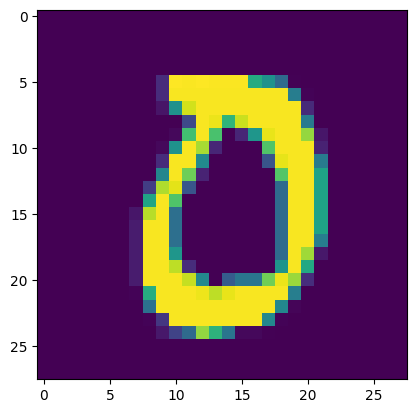

In [3]:
# Load handwritten digit 0
!wget https://ai-studio-static-online.cdn.bcebos.com/088dc9dbabf349c88d029dfd2e07827aa6e41ba958c5434bbd96bc167fc65347 -O data_0.png
image0 = plt.imread('data_0.png')
plt.imshow(image0)

Next, let's configure the model parameters.

In [4]:
test_toml = r"""
# The overall configuration file of the model.
# Enter the current task, which can be 'train' or 'test', representing training and prediction respectively. Here we use test, indicating that we want to make a prediction.
task = 'test'
# The file path of the image to be predicted.
image_path = 'data_0.png'
# Whether the image path above is a folder or not. For folder paths, we will predict all image files inside the folder. This way you can test multiple images at once.
is_dir = false
# The file path of the trained model parameter file.
model_path = 'vsql.pdparams'
# The number of qubits that the quantum circuit contains.
num_qubits = 10
# The number of qubits that the shadow circuit contains.
num_shadow = 2
# Circuit depth.
depth = 1
# The class to be predicted by the model. Here, 0 and 1 are classified.
classes = [0, 1]
"""

Then, we use the VSQL model to make predictions.

In [5]:
config = toml.loads(test_toml)
task = config.pop('task')
prediction, prob = inference(**config)
prob = prob[0]
msg = 'For the input image, the model has'
for idx, item in enumerate(prob):
    if idx == len(prob) - 1:
        msg += 'and'
    label = config['classes'][idx]
    msg += f' {item:3.2%} confidence that it is {label:d}'
    msg += '.' if idx == len(prob) - 1 else ', '
print(msg)

For the input image, the model has 89.22% confidence that it is 0, and 10.78% confidence that it is 1.


Next, let's test another image.

--2023-01-18 15:24:12--  https://ai-studio-static-online.cdn.bcebos.com/c755f723af3d4a1c8f113f8ac3bd365406decd1be70944b7b7b9d41413e8bc7a
Resolving ai-studio-static-online.cdn.bcebos.com (ai-studio-static-online.cdn.bcebos.com)... 119.176.25.35, 153.35.89.225, 211.97.83.35, ...
Connecting to ai-studio-static-online.cdn.bcebos.com (ai-studio-static-online.cdn.bcebos.com)|119.176.25.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 173 [image/png]
Saving to: ‘data_1.png’

data_1.png          100%[===================>]     173  --.-KB/s    in 0s      

2023-01-18 15:24:12 (3.38 KB/s) - ‘data_1.png’ saved [173/173]



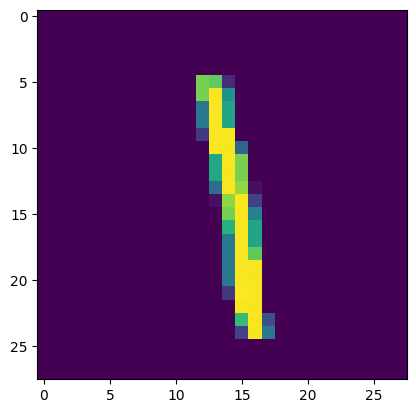

In [6]:
# Load handwritten digit 1
!wget https://ai-studio-static-online.cdn.bcebos.com/c755f723af3d4a1c8f113f8ac3bd365406decd1be70944b7b7b9d41413e8bc7a -O data_1.png
image1 = plt.imread('data_1.png')
plt.imshow(image1)

In [7]:
test_toml = r"""
# The overall configuration file of the model.
# Enter the current task, which can be 'train' or 'test', representing training and prediction respectively. Here we use test, indicating that we want to make a prediction.
task = 'test'
# The file path of the image to be predicted.
image_path = 'data_1.png'
# Whether the image path above is a folder or not. For folder paths, we will predict all image files inside the folder. This way you can test multiple images at once.
is_dir = false
# The file path of the trained model parameter file.
model_path = 'vsql.pdparams'
# The number of qubits that the quantum circuit contains.
num_qubits = 10
# The number of qubits that the shadow circuit contains.
num_shadow = 2
# Circuit depth.
depth = 1
# The class to be predicted by the model. Here, 0 and 1 are classified.
classes = [0, 1]
"""

config = toml.loads(test_toml)
task = config.pop('task')
prediction, prob = inference(**config)
prob = prob[0]
msg = 'For the input image, the model has'
for idx, item in enumerate(prob):
    if idx == len(prob) - 1:
        msg += 'and'
    label = config['classes'][idx]
    msg += f' {item:3.2%} confidence that it is {label:d}'
    msg += '.' if idx == len(prob) - 1 else ', '
print(msg)

For the input image, the model has 18.29% confidence that it is 0, and 81.71% confidence that it is 1.


## 5. Note

The model we provide is a binary classification model that can only be used to distinguish handwritten digits 0 and 1. For other classification tasks, it needs to be retrained.

A more detailed description of the use can be found at https://github.com/PaddlePaddle/Quantum/blob/master/applications/handwritten_digits_classification/introduction_en.ipynb .

A detailed description of the VSQL model can be found at https://github.com/PaddlePaddle/Quantum/blob/master/tutorials/machine_learning/VSQL_EN.ipynb .

## 6. Related papers and citations

```
@inproceedings{li2021vsql,
  title={VSQL: Variational shadow quantum learning for classification},
  author={Li, Guangxi and Song, Zhixin and Wang, Xin},
  booktitle={Proceedings of the AAAI Conference on Artificial Intelligence},
  volume={35},
  number={9},
  pages={8357--8365},
  year={2021}
}
```